<a href="https://colab.research.google.com/github/lesliederas/4105/blob/main/Assignment3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

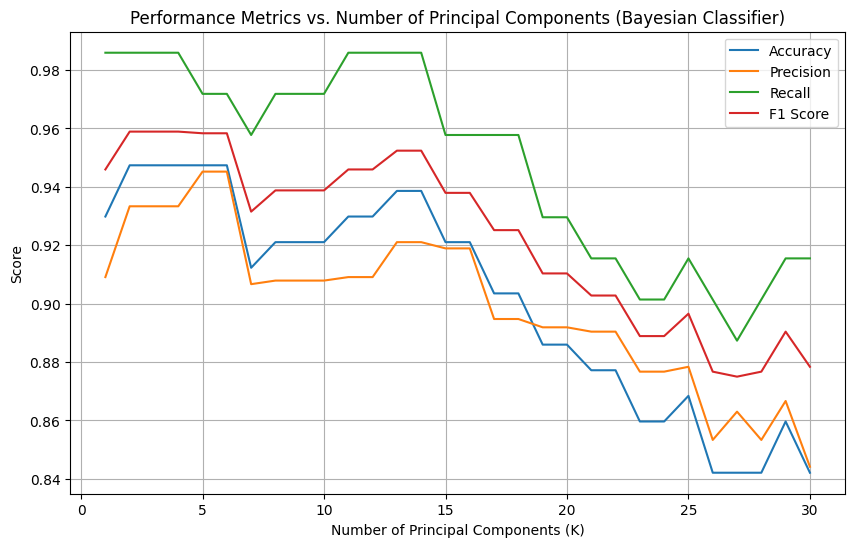

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

breast = load_breast_cancer()
X = breast.data
y = breast.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K_values = range(1, 31)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for K in K_values:
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    bayes_model = GaussianNB()
    bayes_model.fit(X_train, y_train)
    y_pred = bayes_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))

plt.plot(K_values, accuracy_scores, label='Accuracy')
plt.plot(K_values, precision_scores, label='Precision')
plt.plot(K_values, recall_scores, label='Recall')
plt.plot(K_values, f1_scores, label='F1 Score')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Principal Components (Bayesian Classifier)')
plt.legend()
plt.grid(True)
plt.show()


PCA are used for feature extractions to reduce the dimensionality of the feature space.This comparison allows us to assess the performance of different classifiers (logistic regression, Bayesian classifier) and the impact of dimensionality reduction (PCA) on classification performance.
Were in my opinion Baynesian Classifier showed better preformance since it gave a side by side comparsion to the logistic regression.